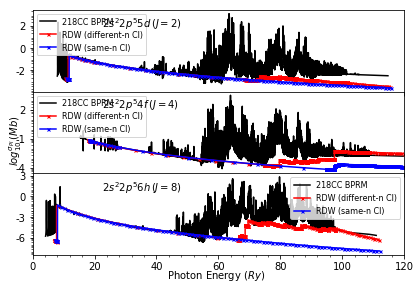

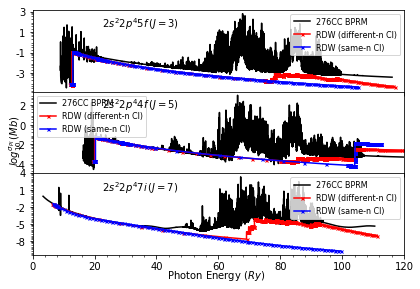

In [2]:
#This script is to show the difference between FAC and BPRM background (CI is important)

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator

from numpy import log10

def setup(ax, indx, num_cc):
	data_bprm = [[], []]
	data_mix = [[], []]
	data_nmix = [[], []]
	
	for line in open(indx+'_bprm'):
		data_line = line.split()
		data_bprm[0].append(float(data_line[0]))
		data_bprm[1].append(float(data_line[1]))
	
	for line in open(indx+'_mixing'):
		data_line = line.split()
		data_mix[0].append(float(data_line[0]))
		data_mix[1].append(float(data_line[1]))
		
	for line in open(indx+'_no_mixing'):
		data_line = line.split()
		data_nmix[0].append(float(data_line[0]))
		data_nmix[1].append(float(data_line[1]))
	
	ax.semilogy(data_bprm[0], data_bprm[1], 'k', label = str(num_cc)+'CC BPRM')
	ax.semilogy(data_mix[0], data_mix[1], '-xr', markersize = 3, label = 'RDW (different-n CI)')
	ax.semilogy(data_nmix[0], data_nmix[1], '-xb', markersize = 3, label = 'RDW (same-n CI)')
	ax.legend(prop={'size': 8})
	
	ax.yaxis.set_major_locator(LogLocator(base = 10, numticks = 5))
	ax.set_yticklabels(ax.get_yticks())
	labels = [str(int(log10(float(label.get_text())))) for label in ax.get_yticklabels()]
	ax.set_yticklabels(labels)
	ax.yaxis.set_minor_locator(LogLocator(base = 10, subs=(0.2, 0.4, 0.6, 0.8), numticks = 20))
	
	ax.xaxis.set_minor_locator(AutoMinorLocator(5))
	ax.set_xticks(range(0, 121, 20))
	ax.set_xticklabels([])
	ax.set_xlim(0, 120)
	
	

	
#========== MAIN ===========
if __name__ == '__main__':
	#============ Fe XVII ============	
	fig_1, axes_1 = plt.subplots(3, 1)
	
	setup(axes_1[0], '2_1_17', 218)
	setup(axes_1[1], '4_0_9', 218)
	setup(axes_1[2], '8_0_12', 218)
	
	axes_1[2].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'])
	fig_1.text(0.4, 0.02, 'Photon Energy ($Ry$)')
	#axes_1[5].set_xlabel('Photon Energy ($Ry$)', fontsize=14)
	fig_1.text(0.05, 0.5, '$log_{10}^{\sigma_{PI}}\,(Mb)$', ha = 'center', va = 'center', rotation = 90)
	
	fig_1.subplots_adjust(hspace=0, left = 0.09, right = 0.95, bottom = 0.10, top = 0.95)
	
	fig_1.text(.25, .93, '$2s^22p^5 5d\,(J=2)$', ha = 'left', va = 'top')
	fig_1.text(.25, .65, '$2s^22p^5 4f\,(J=4)$', ha = 'left', va = 'top')
	fig_1.text(.25, .36, '$2s^22p^5 6h\,(J=8)$', ha = 'left', va = 'top')
	
	#============ Fe XVIII ===========
	fig_2, axes_2 = plt.subplots(3, 1)
	
	setup(axes_2[0], '3_1_47', 276)
	setup(axes_2[1], '5_1_21', 276)
	setup(axes_2[2], '7_0_49', 276)
	
	axes_2[2].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'])
	fig_2.text(0.4, 0.02, 'Photon Energy ($Ry$)')
	#axes_1[5].set_xlabel('Photon Energy ($Ry$)', fontsize=14)
	fig_2.text(0.05, 0.5, '$log_{10}^{\sigma_{PI}}\,(Mb)$', ha = 'center', va = 'center', rotation = 90)
	
	fig_2.subplots_adjust(hspace=0, left = 0.09, right = 0.95, bottom = 0.10, top = 0.95)
	
	fig_2.text(.25, .93, '$2s^22p^4 5f\,(J=3)$', ha = 'left', va = 'top')
	fig_2.text(.25, .65, '$2s^22p^4 4f\,(J=5)$', ha = 'left', va = 'top')
	fig_2.text(.25, .36, '$2s^22p^4 7i\,(J=7)$', ha = 'left', va = 'top')
	
	#======= correction ========
	#reset the yticklabels for the last plot because of the overlap between the labels.
	axes_1[1].set_yticks([1e-4, 1e-1, 1e2])
	axes_1[1].set_yticklabels(['-4', '-1', '2', '2', ''])
	
	axes_2[1].set_yticks([1e-4, 1e-2, 1e0, 1e2])
	axes_2[1].set_yticklabels(['-4', '-2', '0', '2', ''])
	
	plt.show()
	
	#fig_1.savefig('fe17_discrepancy.eps')
	#fig_2.savefig('fe18_discrepancy.eps')